In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import download

In [3]:
df = pd.read_csv('googleplaystore.csv')

In [4]:
# Step 3: Basic Data Exploration
# Display the first few rows
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [5]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [6]:
# Summary statistics of numerical columns
print(df.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [19]:
# Step 4: Data Cleaning
# Check for missing values
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [16]:
# ------------------------------
# Fill missing 'Rating' with category-wise mean
df['Rating'] = df.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(x.mean())
)

# Drop rows where 'App' or 'Category' are missing
df.dropna(subset=['App', 'Category'], inplace=True)

# ------------------------------
# Clean and convert 'Reviews' to int safely
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df.dropna(subset=['Reviews'], inplace=True)
df['Reviews'] = df['Reviews'].astype(int)

# ------------------------------
# Clean and convert 'Price' to float
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)

# ------------------------------
# Define robust cleaning function for 'Installs'
def clean_installs_safe(value):
    try:
        if pd.isna(value):
            return np.nan
        value = str(value).replace(',', '').replace('+', '').strip()
        if 'M' in value:
            return int(float(value.replace('M', '')) * 1_000_000)
        elif 'K' in value:
            return int(float(value.replace('K', '')) * 1_000)
        elif value.isdigit():
            return int(value)
        else:
            return np.nan
    except:
        return np.nan

# Apply cleaning to 'Installs'
df['Installs'] = df['Installs'].apply(clean_installs_safe)

# Drop rows with uncleanable 'Installs'
df.dropna(subset=['Installs'], inplace=True)
df['Installs'] = df['Installs'].astype(int)

# ------------------------------
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# ------------------------------
# Confirm data types and cleaning success
print(df.dtypes)
print(df.isnull().sum())
print(df.head())


App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  A

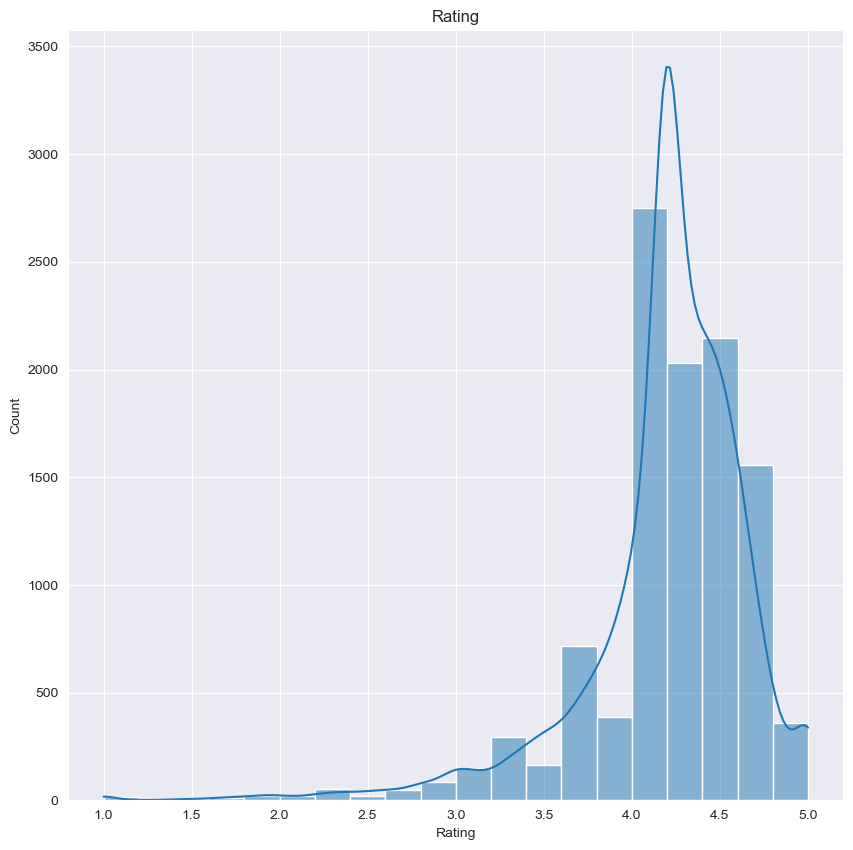

In [18]:
# Step 5: Data Visualization:
plt.figure(figsize =(10, 10))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

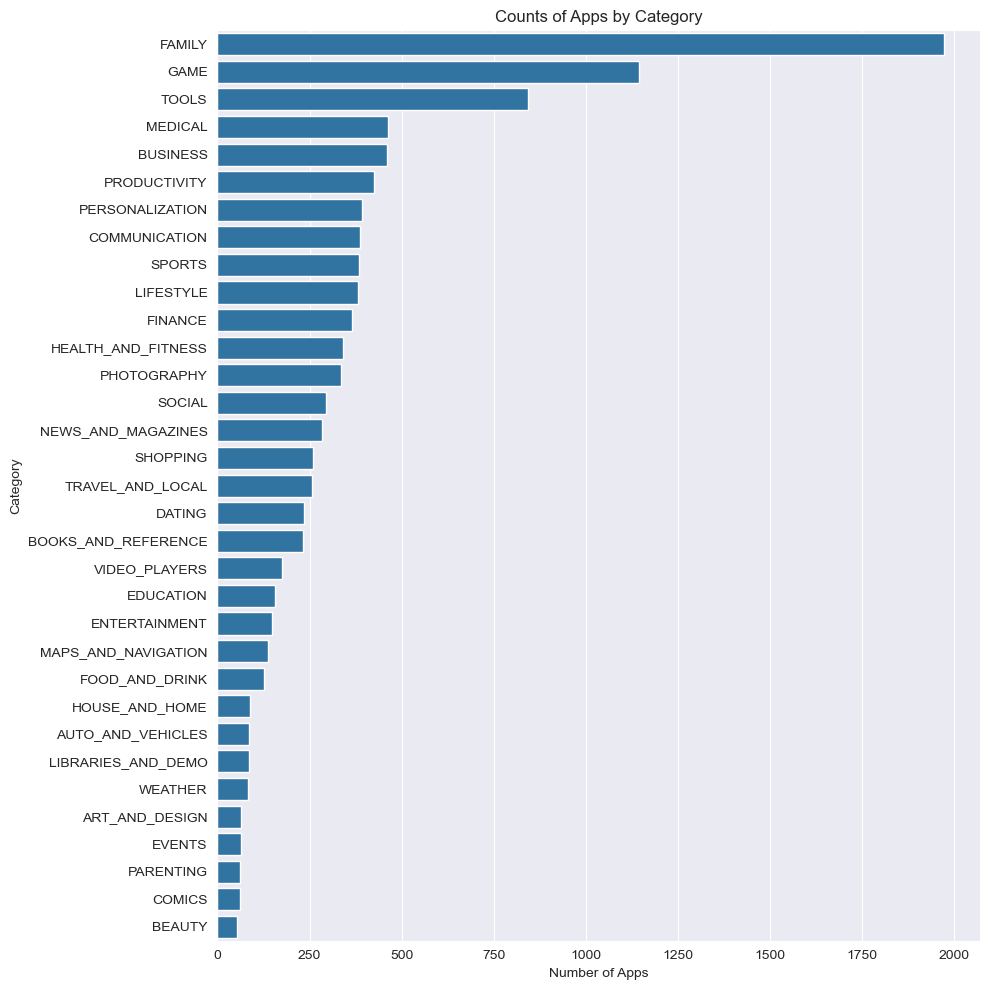

In [24]:
# Count of Apps by Category
plt.figure(figsize=(10, 10))
sns.countplot(y='Category',data=df,order=df['Category'].value_counts().index)
plt.title('Counts of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


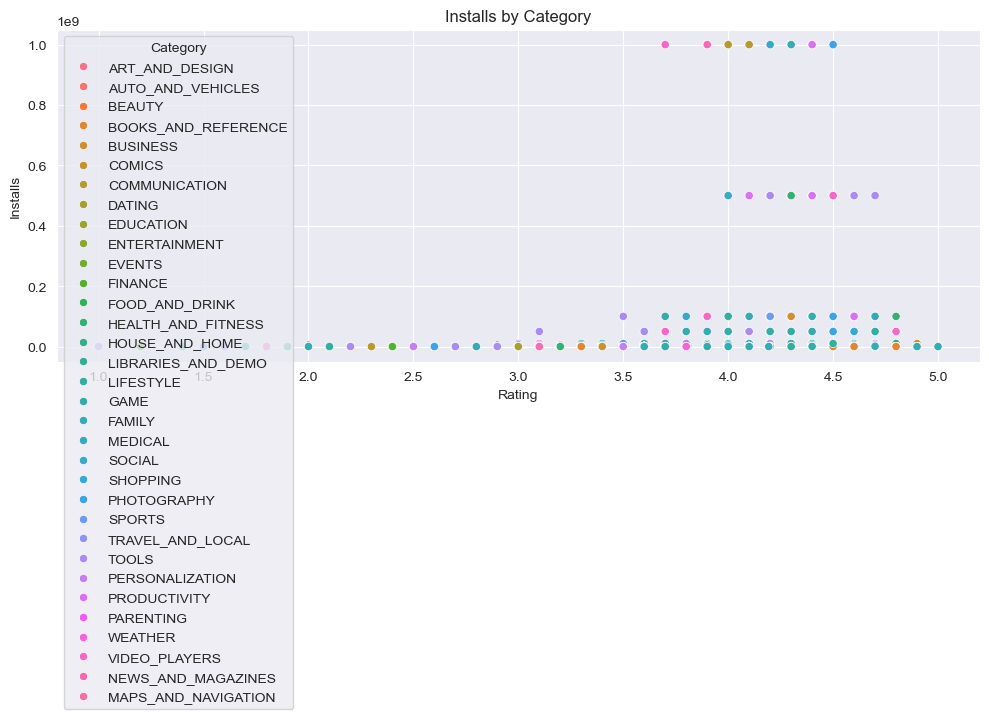

In [26]:
# Relationship between Installs and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating' , y='Installs', data=df, hue='Category')
plt.title('Installs by Category')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.tight_layout()
plt.show()

In [29]:
#Step 6: Analyzing Key Metrics
# Average rating by category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Average Rating by Category:")
print(avg_rating_by_category)

# ------------------------------
# Most popular apps by installs
# Check correct column name ('App' vs 'Apps')
col_name = 'App' if 'App' in df.columns else 'Apps'

most_installed_apps = df[[col_name, 'Installs']].sort_values(by='Installs', ascending=False)
print("\nTop 10 Most Installed Apps:")
print(most_installed_apps.head(10))


Average Rating by Category:
Category
EDUCATION              4.387778
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311026
PERSONALIZATION        4.307603
GAME                   4.282506
PARENTING              4.282223
HEALTH_AND_FITNESS     4.266296
BEAUTY                 4.260882
SHOPPING               4.254052
SOCIAL                 4.248001
WEATHER                4.239675
SPORTS                 4.218404
PRODUCTIVITY           4.208287
HOUSE_AND_HOME         4.196819
FAMILY                 4.192394
PHOTOGRAPHY            4.192179
AUTO_AND_VEHICLES      4.190824
MEDICAL                4.190167
LIBRARIES_AND_DEMO     4.181962
FOOD_AND_DRINK         4.170709
COMMUNICATION          4.163842
COMICS                 4.156445
BUSINESS               4.145987
NEWS_AND_MAGAZINES     4.142993
FINANCE                4.139108
ENTERTAINMENT          4.126174
TRAVEL_AND_LOCAL       4.119716
LIFESTYLE              4.112427
VIDEO_PLAYERS          4.074858
TOO

In [33]:

# Top 5 Genres

# Check correct column name
col_name = 'Genres' if 'Genres' in df.columns else 'genres'

top_genres = df[col_name].value_counts().head(5)

print("\nTop 5 Genres:")
print(top_genres)



Top 5 Genres:
Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64
